**Lab 0**

Random Split

Langkah 1 - Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


Stratified Split

Langkah 1 - Load Data

In [ ]:
import pandas as pd

df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Langkah 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


Cross Validation 1

Langkah 1 - Load Data

In [ ]:
import pandas as pd

df3 = pd.read_csv('Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Langkah 2 - Split Data



In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Cross Validation 2

Langkah 1 - Load Data

In [ ]:
import pandas as pd

df4 = pd.read_csv('Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Langkah 2 - Split Data

In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Lab 1

Langkah 1: Persiapan Data

Langkah 2: Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd

Langkah 3: Baca Data

In [ ]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

Langkah 4: Pemahaman Terhadap Data

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


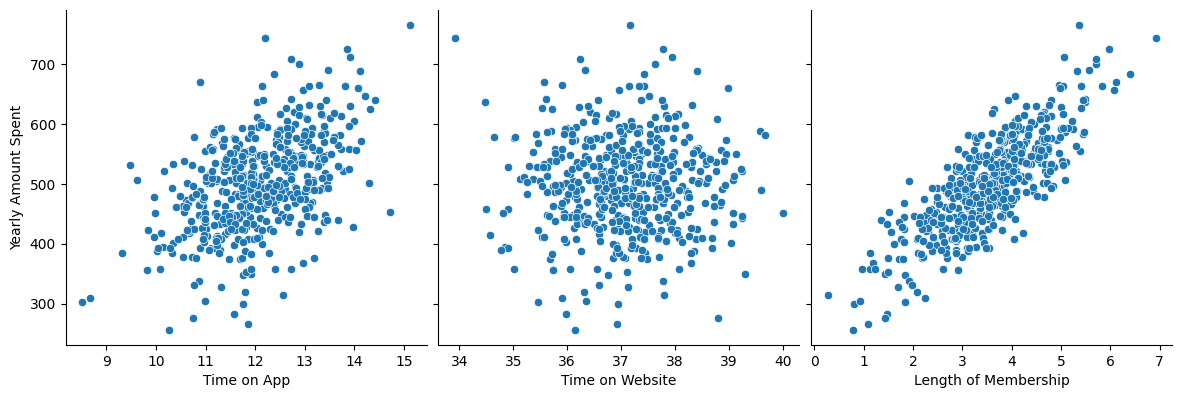

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

ValueError: could not convert string to float: 'mstephenson@fernandez.com'

Langkah 6: Regresi Linier

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

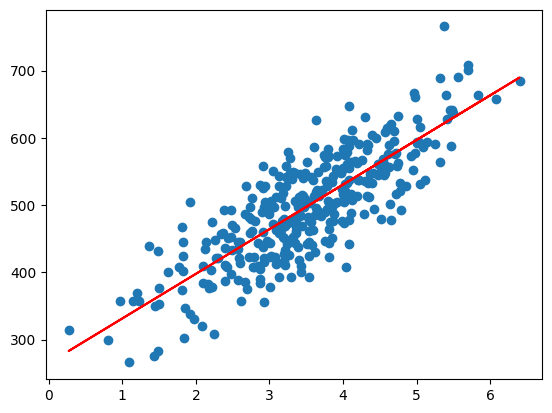

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()


Langkah 7: Analisis Residual

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


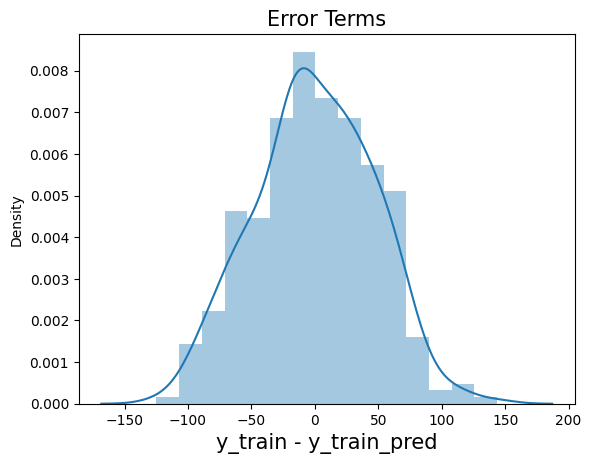

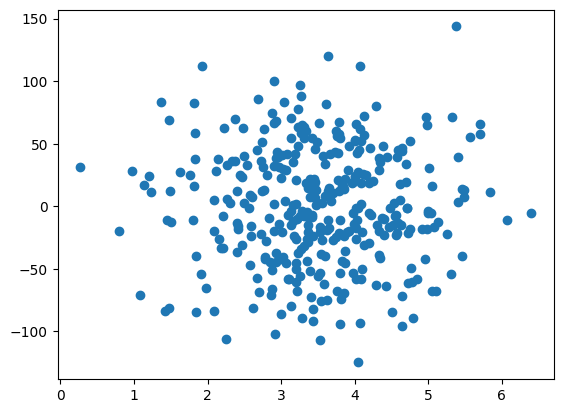

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Langkah 9: Visualisasi Hasil

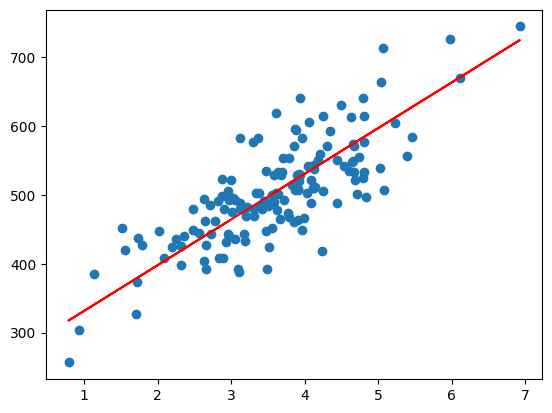

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Lab 2

Langkah 1 - Import Library

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Langkah 2 - Load Dataset

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

Langkah 3 - Features Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

Langkah 4 - Fitting Model SVR

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Langkah 5 - Visualisasi Hasil SVR

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


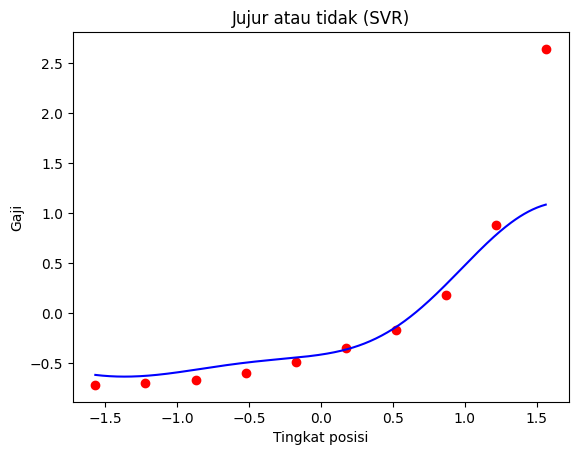

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Langkah 6 - Prediksi Hasil

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Langkah 7 - Menampilkan Hasil

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


Langkah 8 - Evaluasi Model SVR

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.
 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

  2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
  3. Lakukan feature scaling jika diperlukan.
  4. Buat model multiple linear regression menggunakan Scikit-Learn.
  5. Latih model pada data latih dan lakukan prediksi pada data uji.
  6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
   7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.
   
   Catatan Tambahan Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan. Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik. Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('insurance.csv')

# Tampilan baris pertama
print(df.head())

# Info dataset
print(df.info())

# Statistik deskriptif
print(df.describe())

# Cek missing values
print(df.isnull().sum())

# Identifikasi variabel
print("Independent Variables:")
features = [col for col in df.columns if col != 'charges']
for i, feat in enumerate(features, 1):
    print(f"{i}. {feat}")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare data - encode categorical variables
df_processed = df.copy()

# Encoding variabel kategorik menggunakan one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=['sex', 'smoker', 'region'], drop_first=True)

print("setelah encoding:")
print(df_processed.columns.tolist())

# Pisah fitur
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print()
print("RESULTS")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


print("Training set X shape:", X_train.shape)
print("Training set y shape:", y_train.shape)
print("Testing set X shape:", X_test.shape)
print("Testing set y shape:", y_test.shape)

setelah encoding:
['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Jumlah fitur: 8
Jumlah sampel: 1338

RESULTS
Training set: 1070 samples (80.0%)
Testing set: 268 samples (20.0%)
Training set X shape: (1070, 8)
Training set y shape: (1070,)
Testing set X shape: (268, 8)
Testing set y shape: (268,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print()
print("FEATURE SCALING")
print("Metode: StandardScaler (mean=0, std=1)")

print()
print("Sebelum scaling (5 sampel pertama training data):")
print(X_train.head())

print()
print("Sesudah scaling (5 sampel pertama training data):")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())


print("Statistik SEBELUM scaling:")
print(X_train.describe().loc[['mean', 'std']])
print()

print("Statistik SETELAH scaling:")
print(X_train_scaled_df.describe().loc[['mean', 'std']])
print()

print("Feature scaling penting untuk SVR, tapi tidak wajib untuk Linear Regression")


FEATURE SCALING
Metode: StandardScaler (mean=0, std=1)

Sebelum scaling (5 sampel pertama training data):
      age    bmi  children  sex_male  smoker_yes  region_northwest  \
560    46  19.95         2     False       False              True   
1285   47  24.32         0     False       False             False   
1142   52  24.86         0     False       False             False   
969    39  34.32         5     False       False             False   
486    54  21.47         3     False       False              True   

      region_southeast  region_southwest  
560              False             False  
1285             False             False  
1142              True             False  
969               True             False  
486              False             False  

Sesudah scaling (5 sampel pertama training data):
        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0  0.472227 -1.756525  0.734336 -1.024602   -0.508747          1.783168   
1  0.543313 -

Training Linear Regression model...
Training selesai!

LINEAR REGRESSION - EVALUATION RESULTS

Training Set Performance:
R² Score    : 0.7417
MSE         : $37,277,681.70
RMSE        : $6,105.55
MAE         : $4,208.23

Testing Set Performance:
R² Score    : 0.7836
MSE         : $33,596,915.85
RMSE        : $5,796.28
MAE         : $4,181.19

INTERPRETASI:
Model dapat menjelaskan 78.36% variasi dalam biaya medis
Rata-rata error prediksi: $4,181.19
Model cukup baik (tidak overfit)


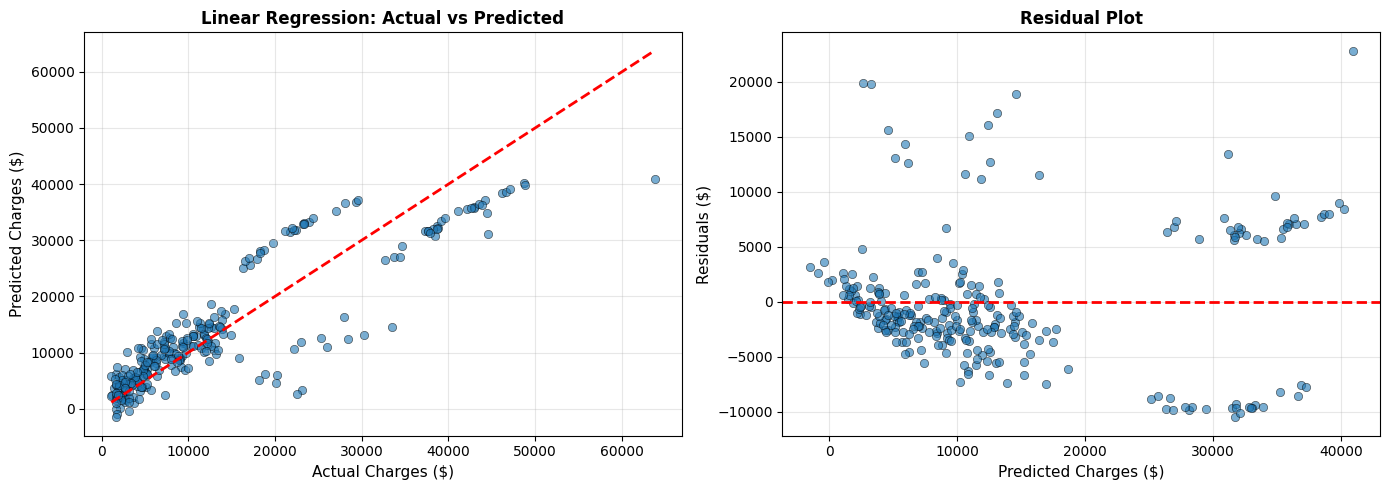


FEATURE COEFFICIENTS (Importance)
smoker_yes          : $  9,558.48
age                 : $  3,614.98
bmi                 : $  2,036.23
children            : $    516.89
region_southwest    : $   -349.11
region_southeast    : $   -290.16
region_northwest    : $   -158.14
sex_male            : $     -9.29


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Inisialisasi model
lr_model = LinearRegression()

# Training model
print("Training Linear Regression model...")
lr_model.fit(X_train_scaled, y_train)
print("Training selesai!\n")

# Prediksi
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluasi model
print("="*50)
print("LINEAR REGRESSION - EVALUATION RESULTS")
print("="*50)

# Evaluasi training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining Set Performance:")
print(f"R² Score    : {r2_train:.4f}")
print(f"MSE         : ${mse_train:,.2f}")
print(f"RMSE        : ${rmse_train:,.2f}")
print(f"MAE         : ${mae_train:,.2f}")

# Evaluasi testing set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTesting Set Performance:")
print(f"R² Score    : {r2_test:.4f}")
print(f"MSE         : ${mse_test:,.2f}")
print(f"RMSE        : ${rmse_test:,.2f}")
print(f"MAE         : ${mae_test:,.2f}")

# Interpretasi
print("\n" + "="*50)
print("INTERPRETASI:")
print("="*50)
print(f"Model dapat menjelaskan {r2_test*100:.2f}% variasi dalam biaya medis")
print(f"Rata-rata error prediksi: ${mae_test:,.2f}")
print(f"Model {'overfit' if r2_train - r2_test > 0.1 else 'cukup baik (tidak overfit)'}")

# Visualisasi hasil prediksi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges ($)', fontsize=11)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=11)
axes[0].set_title('Linear Regression: Actual vs Predicted', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Plot 2: Residual plot
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Charges ($)', fontsize=11)
axes[1].set_ylabel('Residuals ($)', fontsize=11)
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (koefisien)
print("\n" + "="*50)
print("FEATURE COEFFICIENTS (Importance)")
print("="*50)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for idx, row in coef_df.iterrows():
    print(f"{row['Feature']:20s}: ${row['Coefficient']:>10,.2f}")

SVR MODEL - BASELINE (Default Parameters)

Training SVR baseline model...
Training selesai dalam 0.12 detik

Baseline SVR Performance (Testing Set):
R² Score    : -0.0701
MSE         : $166,128,803.81
RMSE        : $12,889.10
MAE         : $8,612.41

HYPERPARAMETER TUNING (GridSearchCV)

Parameter grid untuk tuning:
  kernel: ['rbf', 'linear']
  C: [10, 100, 1000]
  gamma: ['scale', 0.01, 0.1]
  epsilon: [0.1, 0.2, 0.5]

Total kombinasi: 54
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Tuning selesai dalam 28.31 detik

BEST PARAMETERS FOUND
C         : 1000
epsilon   : 0.1
gamma     : 0.1
kernel    : rbf

SVR MODEL - TUNED (Best Parameters)

Training Set Performance:
R² Score    : 0.7317

Testing Set Performance:
R² Score    : 0.7581
MSE         : $37,552,031.84
RMSE        : $6,127.97
MAE         : $2,736.59

COMPARISON: Baseline vs Tuned SVR
Metric                 Baseline           Tuned     Improvement
------------------------------------------------------------
R²

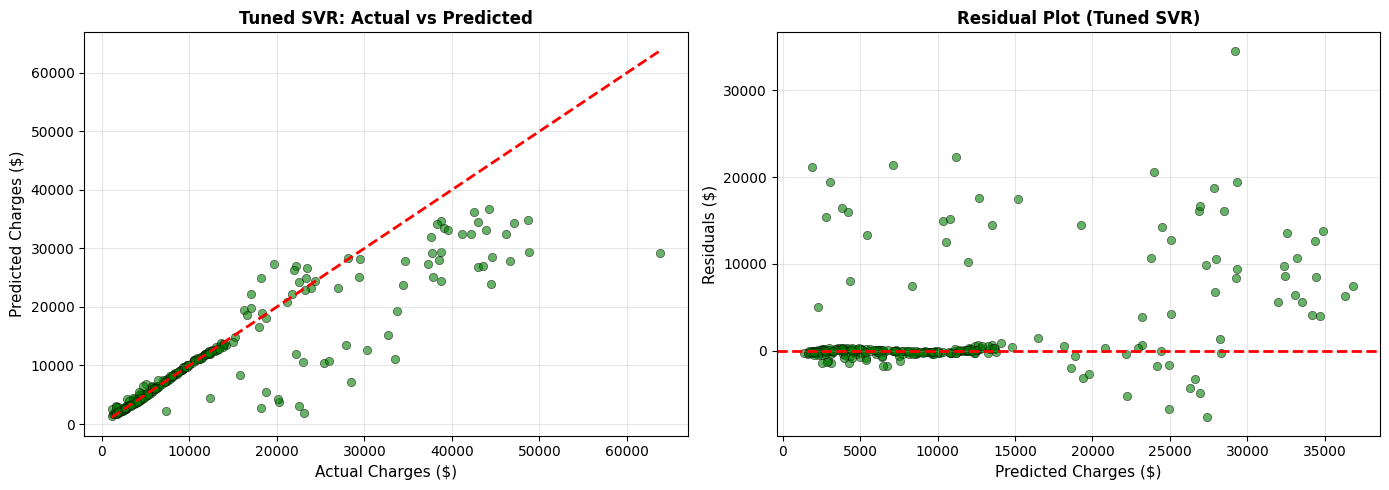

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import time

# SVR tanpa tuning (baseline)
print("="*50)
print("SVR MODEL - BASELINE (Default Parameters)")
print("="*50)

svr_baseline = SVR()
print("\nTraining SVR baseline model...")
start_time = time.time()
svr_baseline.fit(X_train_scaled, y_train)
baseline_time = time.time() - start_time
print(f"Training selesai dalam {baseline_time:.2f} detik\n")

# Prediksi baseline
y_train_pred_svr = svr_baseline.predict(X_train_scaled)
y_test_pred_svr = svr_baseline.predict(X_test_scaled)

# Evaluasi baseline
r2_train_svr = r2_score(y_train, y_train_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)

print("Baseline SVR Performance (Testing Set):")
print(f"R² Score    : {r2_test_svr:.4f}")
print(f"MSE         : ${mse_test_svr:,.2f}")
print(f"RMSE        : ${rmse_test_svr:,.2f}")
print(f"MAE         : ${mae_test_svr:,.2f}")

# Hyperparameter Tuning dengan GridSearchCV
print("\n" + "="*50)
print("HYPERPARAMETER TUNING (GridSearchCV)")
print("="*50)

# Define parameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [10, 100, 1000],
    'gamma': ['scale', 0.01, 0.1],
    'epsilon': [0.1, 0.2, 0.5]
}

print("\nParameter grid untuk tuning:")
for key, values in param_grid.items():
    print(f"  {key}: {values}")

print(f"\nTotal kombinasi: {np.prod([len(v) for v in param_grid.values()])}")

# GridSearchCV
grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
tuning_time = time.time() - start_time

print(f"\nTuning selesai dalam {tuning_time:.2f} detik")

# Best parameters
print("\n" + "="*50)
print("BEST PARAMETERS FOUND")
print("="*50)
for param, value in grid_search.best_params_.items():
    print(f"{param:10s}: {value}")

# Train model dengan parameter terbaik
print("\n" + "="*50)
print("SVR MODEL - TUNED (Best Parameters)")
print("="*50)

svr_tuned = grid_search.best_estimator_

# Prediksi dengan model tuned
y_train_pred_tuned = svr_tuned.predict(X_train_scaled)
y_test_pred_tuned = svr_tuned.predict(X_test_scaled)

# Evaluasi model tuned
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
rmse_test_tuned = np.sqrt(mse_test_tuned)

print("\nTraining Set Performance:")
print(f"R² Score    : {r2_train_tuned:.4f}")

print("\nTesting Set Performance:")
print(f"R² Score    : {r2_test_tuned:.4f}")
print(f"MSE         : ${mse_test_tuned:,.2f}")
print(f"RMSE        : ${rmse_test_tuned:,.2f}")
print(f"MAE         : ${mae_test_tuned:,.2f}")

# Perbandingan
print("\n" + "="*50)
print("COMPARISON: Baseline vs Tuned SVR")
print("="*50)
print(f"{'Metric':<15} {'Baseline':>15} {'Tuned':>15} {'Improvement':>15}")
print("-"*60)
print(f"{'R² Score':<15} {r2_test_svr:>15.4f} {r2_test_tuned:>15.4f} {(r2_test_tuned-r2_test_svr):>15.4f}")
print(f"{'MAE':<15} ${mae_test_svr:>14,.2f} ${mae_test_tuned:>14,.2f} ${(mae_test_svr-mae_test_tuned):>14,.2f}")
print(f"{'RMSE':<15} ${rmse_test_svr:>14,.2f} ${rmse_test_tuned:>14,.2f} ${(rmse_test_svr-rmse_test_tuned):>14,.2f}")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted (Tuned SVR)
axes[0].scatter(y_test, y_test_pred_tuned, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges ($)', fontsize=11)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=11)
axes[0].set_title('Tuned SVR: Actual vs Predicted', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Plot 2: Residual plot
residuals_svr = y_test - y_test_pred_tuned
axes[1].scatter(y_test_pred_tuned, residuals_svr, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Charges ($)', fontsize=11)
axes[1].set_ylabel('Residuals ($)', fontsize=11)
axes[1].set_title('Residual Plot (Tuned SVR)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()